# **Breast Cancer Diagnostic o Diagnóstico de cáncer de mama**

El objetivo de este proyecto es construir un modelo capaz de predecir el diagnóstico de tejidos de cáncer de mama como malignos o benignos. Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA, por sus siglas en inglés) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Distribución de clases: 357 benignas, 212 malignas. Más información sobre este conjunto de datos en https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## **Leer Dataset**

In [1]:
import pandas as pd 
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
cancer_tissues.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
cancer_tissues.shape

(569, 33)

### **Información de los atributos**

1) ID number

2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## **Preparación del Dataset**

En primer lugar, separo las columnas "id" y "Unnamed" de mi dataset que no me aportan información.

In [3]:
cancer_tissues = cancer_tissues.drop(columns=['id','Unnamed: 32'])
cancer_tissues.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Fueron medidas 10 características de los núcleos celulares y se les calculó su media, desviación estándar y "peor" valor. Entonces termino teniendo 30 atributos. Voy a realizar histogramas por separado, es decir, primero de las medias, y luego de las otras dos, ya que me interesa ver si puedo distinguir la relevancia de los atributos correspondientes a desviación estándar y "peor" valor.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

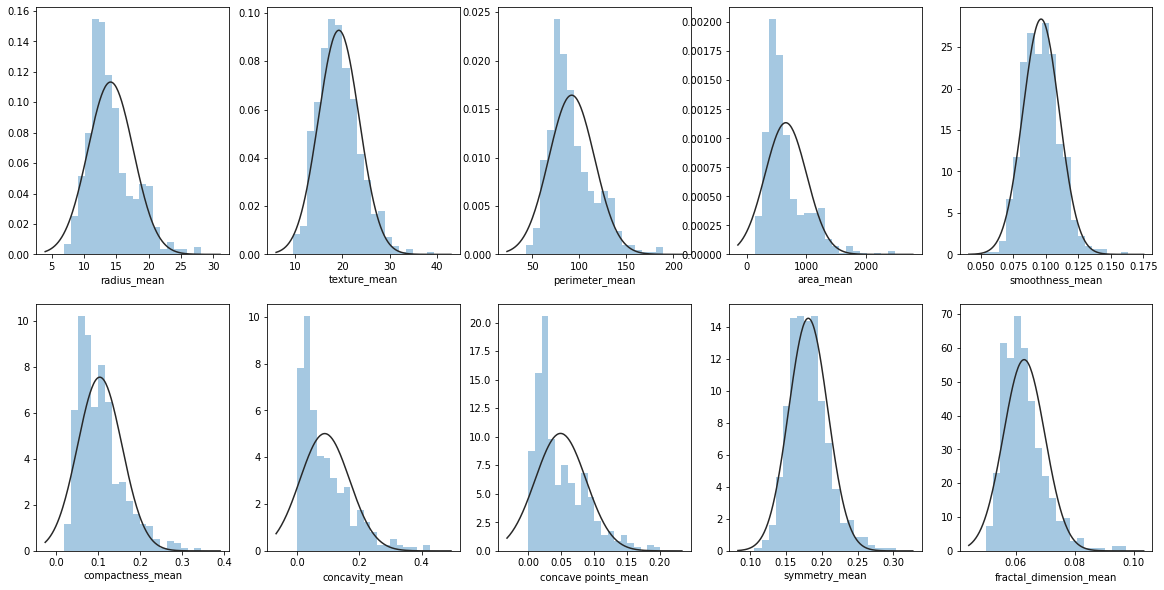

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

fig, axes = plt.subplots(2, 5, figsize=(20,10))

sns.distplot(cancer_tissues['radius_mean'], fit=norm , kde=False, bins=20, ax=axes[0,0])
sns.distplot(cancer_tissues['texture_mean'], fit=norm , kde=False, bins=20, ax=axes[0,1])
sns.distplot(cancer_tissues['perimeter_mean'], fit=norm , kde=False, bins=20, ax=axes[0,2])
sns.distplot(cancer_tissues['area_mean'], fit=norm , kde=False, bins=20, ax=axes[0,3])
sns.distplot(cancer_tissues['smoothness_mean'], fit=norm , kde=False, bins=20, ax=axes[0,4])
sns.distplot(cancer_tissues['compactness_mean'], fit=norm , kde=False, bins=20, ax=axes[1,0])
sns.distplot(cancer_tissues['concavity_mean'], fit=norm , kde=False, bins=20, ax=axes[1,1])
sns.distplot(cancer_tissues['concave points_mean'], fit=norm , kde=False, bins=20, ax=axes[1,2])
sns.distplot(cancer_tissues['symmetry_mean'], fit=norm , kde=False, bins=20, ax=axes[1,3])
sns.distplot(cancer_tissues['fractal_dimension_mean'], fit=norm , kde=False, bins=20, ax=axes[1,4])

Vemos que las medias de las características medidas siguen distribuciones aproximadamente normales, pero cuyas escalas no son las mismas. Por lo tanto será conveniente estandarizarlas. Veamos ahora las desviaciones estándar.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

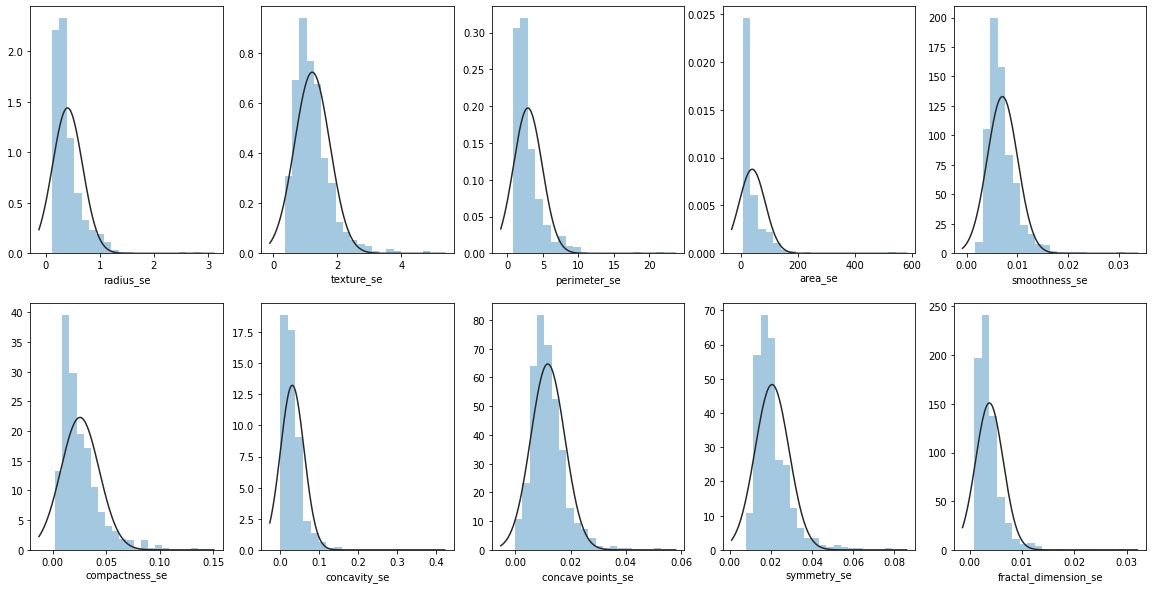

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

sns.distplot(cancer_tissues['radius_se'], fit=norm , kde=False, bins=20, ax=axes[0,0])
sns.distplot(cancer_tissues['texture_se'], fit=norm , kde=False, bins=20, ax=axes[0,1])
sns.distplot(cancer_tissues['perimeter_se'], fit=norm , kde=False, bins=20, ax=axes[0,2])
sns.distplot(cancer_tissues['area_se'], fit=norm , kde=False, bins=20, ax=axes[0,3])
sns.distplot(cancer_tissues['smoothness_se'], fit=norm , kde=False, bins=20, ax=axes[0,4])
sns.distplot(cancer_tissues['compactness_se'], fit=norm , kde=False, bins=20, ax=axes[1,0])
sns.distplot(cancer_tissues['concavity_se'], fit=norm , kde=False, bins=20, ax=axes[1,1])
sns.distplot(cancer_tissues['concave points_se'], fit=norm , kde=False, bins=20, ax=axes[1,2])
sns.distplot(cancer_tissues['symmetry_se'], fit=norm , kde=False, bins=20, ax=axes[1,3])
sns.distplot(cancer_tissues['fractal_dimension_se'], fit=norm , kde=False, bins=20, ax=axes[1,4])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

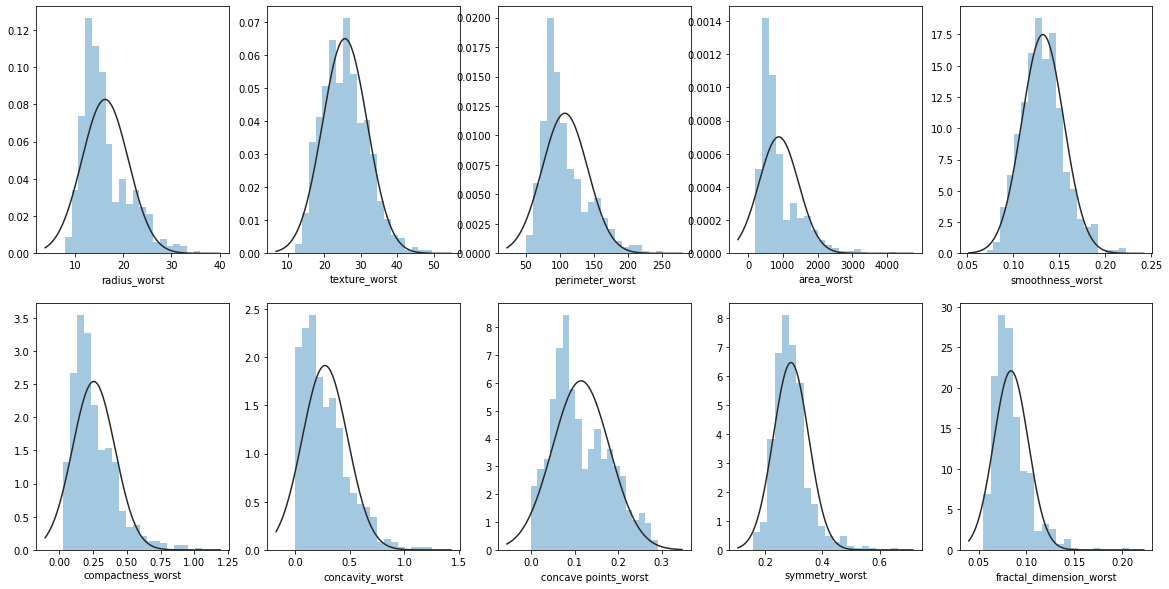

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

sns.distplot(cancer_tissues['radius_worst'], fit=norm , kde=False, bins=20, ax=axes[0,0])
sns.distplot(cancer_tissues['texture_worst'], fit=norm , kde=False, bins=20, ax=axes[0,1])
sns.distplot(cancer_tissues['perimeter_worst'], fit=norm , kde=False, bins=20, ax=axes[0,2])
sns.distplot(cancer_tissues['area_worst'], fit=norm , kde=False, bins=20, ax=axes[0,3])
sns.distplot(cancer_tissues['smoothness_worst'], fit=norm , kde=False, bins=20, ax=axes[0,4])
sns.distplot(cancer_tissues['compactness_worst'], fit=norm , kde=False, bins=20, ax=axes[1,0])
sns.distplot(cancer_tissues['concavity_worst'], fit=norm , kde=False, bins=20, ax=axes[1,1])
sns.distplot(cancer_tissues['concave points_worst'], fit=norm , kde=False, bins=20, ax=axes[1,2])
sns.distplot(cancer_tissues['symmetry_worst'], fit=norm , kde=False, bins=20, ax=axes[1,3])
sns.distplot(cancer_tissues['fractal_dimension_worst'], fit=norm , kde=False, bins=20, ax=axes[1,4])

Lo que observo es que todos los atributos presentan distribuciones marcadas y no veo una razón para descartar alguno, pero el dataset me resulta bastante ancho cómo para entrenar mi modelo con todos los atributos. Lo que se me ocurre es separar el dataset en tres distintos: uno con los atributos 'mean', otro con 'se' y otro con 'worst'. Luego entrenar un clasificador económico con estos tres datasets por separado, mezclando de a dos y con el dataset completo, y que me sirva de base para intentar determinar la importancia de cada una de estas cantidades, si es que sacando alguna obtengo mejores resultados.

Por tratarse de cantidades cuantitativas, voy a utilizar como clasificador de base "Regresión Logística". Haré pruebas rápidas comparando la exactitud del modelo utilizando los distintos datasets.

### **'M' como clase positiva**

Procedo primero a separar el atributo target, eligiendo 'M' como la clase positiva y 'B' como la negativa.

In [7]:
import numpy as np 

y = np.array(cancer_tissues['diagnosis'])

y = np.where(y == 'M', 1, 0)  # Si el elemento es M me lo reemplaza por 1, si no por 0.
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### **Separación de atributos**

Preparo los distintos datasets. Voy a contar con 7 datasets diferentes:

1) total features: 30 atributos

2) mean + se features: 20 atributos

3) mean + worst features: 20 atributos

4) se + worst features: 20 atributos

5) mean features: 10 atributos

6) se features: 10 atributos

7) worst features: 10 atributos



In [8]:
data_total = cancer_tissues.drop(columns=['diagnosis'])

data_mean_se = data_total.drop(columns=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
data_mean_worst = data_total.drop(columns=['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])
data_se_worst = data_total.drop(columns=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])

data_mean = data_mean_se.drop(columns=['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'])
data_se = data_mean_se.drop(columns=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])
data_worst = data_mean_worst.drop(columns=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])

data_total.shape, data_mean_se.shape, data_mean_worst.shape, data_se_worst.shape, data_mean.shape, data_se.shape, data_worst.shape

((569, 30), (569, 20), (569, 20), (569, 20), (569, 10), (569, 10), (569, 10))

In [9]:
x_total = np.array(data_total)
x_mean_se = np.array(data_mean_se)
x_mean_worst = np.array(data_mean_worst)
x_se_worst = np.array(data_se_worst)
x_mean = np.array(data_mean)
x_se = np.array(data_se)
x_worst = np.array(data_worst)

### **Estandarización**

Procedo a estandarizar los datos dado que están a escalas diferentes.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_total)
x_total = scaler.transform(x_total)

scaler.fit(x_mean_se)
x_mean_se = scaler.transform(x_mean_se)

scaler.fit(x_mean_worst)
x_mean_worst = scaler.transform(x_mean_worst)

scaler.fit(x_se_worst)
x_se_worst = scaler.transform(x_se_worst)

scaler.fit(x_mean)
x_mean = scaler.transform(x_mean)

scaler.fit(x_se)
x_se = scaler.transform(x_se)

scaler.fit(x_worst)
x_worst = scaler.transform(x_worst)

## **Regresión Logística**

Preparemos la función que me entrene el clasificador LogisticRegression para cualquier x de entrada.

In [11]:
def LogReg(x, y, ts):

  from sklearn.linear_model import LogisticRegression
  LogReg = LogisticRegression()

  # Separo entre train y validation data
  from sklearn.model_selection import train_test_split

  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=ts, random_state=20)
  x_train, y_train

  # Entreno el clasificador
  LogReg.fit(x_train,y_train)
  y_pred = LogReg.predict(x_test)

  # Calculo los parámetros de evaluación
  from sklearn import metrics

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  f_measure = metrics.f1_score(y_test, y_pred)

  print('Accuracy = ', round(accuracy,3),'Precision = ', round(precision,3),'F_measure = ', round(f_measure,3))

Ahora se lo aplico a todos mis datasets utilziando un 80% de datos para entrenar.

In [12]:
print('Total')
LogReg(x_total, y, 0.8)
print('Mean + SE')
LogReg(x_mean_se, y, 0.8)
print('Mean + Worst')
LogReg(x_mean_worst, y, 0.8)
print('SE + Worst')
LogReg(x_se_worst, y, 0.8)
print('Mean')
LogReg(x_mean, y, 0.8)
print('SE')
LogReg(x_se, y, 0.8)
print('Worst')
LogReg(x_worst, y, 0.8)

Total
Accuracy =  0.991 Precision =  1.0 F_measure =  0.989
Mean + SE
Accuracy =  0.965 Precision =  0.958 F_measure =  0.958
Mean + Worst
Accuracy =  0.991 Precision =  1.0 F_measure =  0.989
SE + Worst
Accuracy =  0.974 Precision =  1.0 F_measure =  0.968
Mean
Accuracy =  0.956 Precision =  0.978 F_measure =  0.946
SE
Accuracy =  0.868 Precision =  0.902 F_measure =  0.831
Worst
Accuracy =  0.991 Precision =  1.0 F_measure =  0.989


De las métricas obtenidas mediante el clasificador de regresión logística para cada uno de los datasets, observo hay tres datasets que me arrojan las métricas más altas: 'total', 'mean + worst' y 'worst'. 

De aquí concluyo que los atributos 'worst' son sumamente importantes a la hora de clasificar si un tumor es maligno, ya que cuando no los tengo en cuenta las métricas bajan considerablemente.

Por otra parte, observo que los atributos 'se' me perjudican el modelo porque por sí solos el modelo me devuelve unas métricas muy bajas respecto al resto de los casos y además el dataset 'se + worst' me da peores métricas que el de 'worst' por sí solo. Por lo que considerar estos atributos pienso que sería perjudicial para el modelo y decido descartarlos de mi dataset en lo que sigue.

La pregunta es si me quedo con los 'worst' solos o con 'mean + worst'. De los resultados que obtuve pareciera que considerar los 'mean' no me mejora el modelo, pero por las dudas voy a realizar un par de pruebas más con estos dos datasets disminuyendo la cantidad de datos de entrenamiento.



In [13]:
print('Train Size = 0.7')
print('Mean + Worst')
LogReg(x_mean_worst, y, 0.7)
print('Worst')
LogReg(x_worst, y, 0.7)
print('Train Size = 0.6')
print('Mean + Worst')
LogReg(x_mean_worst, y, 0.6)
print('Worst')
LogReg(x_worst, y, 0.6)
print('Train Size = 0.5')
print('Mean + Worst')
LogReg(x_mean_worst, y, 0.5)
print('Worst')
LogReg(x_worst, y, 0.5)

Train Size = 0.7
Mean + Worst
Accuracy =  0.994 Precision =  1.0 F_measure =  0.992
Worst
Accuracy =  0.988 Precision =  1.0 F_measure =  0.984
Train Size = 0.6
Mean + Worst
Accuracy =  0.991 Precision =  0.988 F_measure =  0.988
Worst
Accuracy =  0.991 Precision =  1.0 F_measure =  0.987
Train Size = 0.5
Mean + Worst
Accuracy =  0.979 Precision =  0.981 F_measure =  0.971
Worst
Accuracy =  0.975 Precision =  0.981 F_measure =  0.967


De aquí observo que no considerar los atributos 'mean' me baja las métricas en todos los casos, excpeto para 'train_size = 0.6' que me sube la precisión pero de me baja la f_measure, por lo que puede deberse a un desbalance de clases. Por lo tanto decido quedarme con estos atributos y trabajar de ahora en más con el dataset 'mean + worst'.

Por otra parte observo que utilizando un 70% de datos para entrenamiento las métricas son mejores que si utilizo un 80%. Pero me da la sensación de que son pocos datos. Por lo que decido utilizar un 75% de datos de entrenamiento de ahora en más. Entrenemos el clasificador de regresión logística con estos parámetros.

In [17]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

# Separo entre train y validation data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_mean_worst, y, train_size=0.75, random_state=20)
x_train, y_train

# Entreno el clasificador
LogReg.fit(x_train,y_train)
y_pred = LogReg.predict(x_test)

# Calculo los parámetros de evaluación
from sklearn import metrics
print("Classification report for classifier {}\n{}\n".format(LogReg, metrics.classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      0.98      0.99        57

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143




Observamos que las métricas son muy satisfactorias. Observemos la matriz de confusión.

Confusion matrix:
[[86  0]
 [ 1 56]]


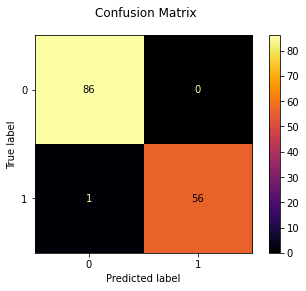

In [18]:
disp = metrics.plot_confusion_matrix(LogReg, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Se ve claramente la alta precisión y exactitud del modelo. Hay un sólo dato falso, en este caso un falso negativo. Para el dataset con el cual estoy trabajando, del total de tumores benignos el clasificador acierta el 100% y del total de tumores malignos hay un solo caso que me lo predice como benigno.

Teniendo esto como base apliquemos otros dos clasificadores al mismo dataset para comparar distintos modelos y clasificadores.

## **Support Vector Machines**

Comencemos con este clasificador utilizando un kernel Gaussiano con parámetro gamma = 0.001.

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        86
           1       1.00      0.88      0.93        57

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143


Confusion matrix:
[[86  0]
 [ 7 50]]


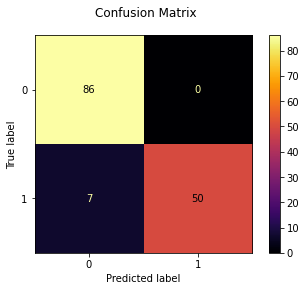

In [21]:
from sklearn import svm

suppvm = svm.SVC(gamma=0.001)
suppvm.fit(x_train, y_train)
y_pred = suppvm.predict(x_test)

print("Classification report for classifier {}\n{}\n".format(suppvm, metrics.classification_report(y_test, y_pred)))

disp = metrics.plot_confusion_matrix(suppvm, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Observamos que para los parámetros utilizados, el clasificador svm arroja una exactitud menor respecto a regresión logística, prediciendo 7 casos malignos como benignos. Realicemos un grid search con distintos kernels y valores de gamma para ver si podemos mejorar este número.  

Automatically created module for IPython interactive environment
Tuning hyper-parameters

Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      0.98      0.99        57

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


Confusion matrix:
[[86  0]
 [ 1 56]]


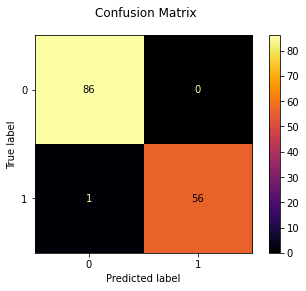

In [27]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

print(__doc__)

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': [0.01, 0.001, 0.0001]},{'C': [1, 10, 100, 1000], 'kernel': ['linear']}]

print("Tuning hyper-parameters")
print()

gs = GridSearchCV(svm.SVC(), parameters, scoring='accuracy')
gs.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(gs.best_params_)
print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, gs.predict(x_test)
print(metrics.classification_report(y_true, y_pred))
print()

disp = metrics.plot_confusion_matrix(gs.best_estimator_, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)    

Observamos que el mejor clasificador para los datos de entrenamiento utilizados se obtiene considerando un kernel sigmoide con un valor de gamma = 0.01 y un valor de C = 10 (C controla la regularización del modelo). Con estos parámetros alcanzamos la misma exactitud que para el clasificador de regresión logística, obteniendo un único falso negativo.

## **Perceptron**

Probemos ahora con este clasificador sin tocar sus parámetros y luego realicemos un grid search.

Classification report for classifier Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        86
           1       0.98      0.91      0.95        57

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143


Confusion matrix:
[[85  1]
 [ 5 52]]


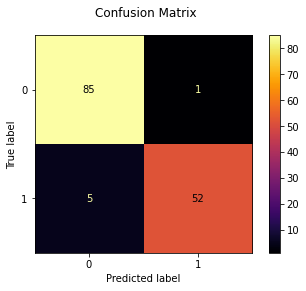

In [29]:
from sklearn.linear_model import Perceptron

percep = Perceptron()
percep.fit(x_train, y_train)

y_pred = percep.predict(x_test)

print("Classification report for classifier {}\n{}\n".format(percep, metrics.classification_report(y_test, y_pred)))

disp = metrics.plot_confusion_matrix(percep, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Observamos que para los parámetros utilizados, el clasificador perceptrón arroja valores bajos en las métricas respecto de los dos anteriores, prediciendo 5 casos malignos como benignos y 1 benigno como maligno. Realicemos un grid search para ver si podemos mejorar las métricas.

Automatically created module for IPython interactive environment
Tuning hyper-parameters

Best parameters set found on development set:

{'alpha': 0.0001, 'penalty': 'l2'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        86
           1       0.98      0.95      0.96        57

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


Confusion matrix:
[[85  1]
 [ 3 54]]


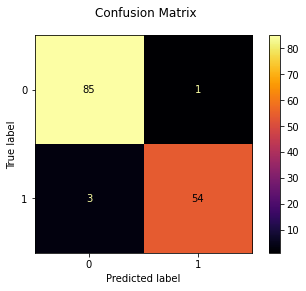

In [39]:
print(__doc__)

parameters = {'penalty': ['l2','l1','elasticnet'], 'alpha': [0.01, 0.001, 0.0001]}

print("Tuning hyper-parameters")
print()

gs = GridSearchCV(Perceptron(), parameters, scoring='accuracy')
gs.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(gs.best_params_)
print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, gs.predict(x_test)
print(metrics.classification_report(y_true, y_pred))
print()

disp = metrics.plot_confusion_matrix(gs.best_estimator_, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Observamos que el mejor modelo para los datos de entrenamiento utilizados se obtiene considerando una penalidad 'l2' (que me controla la regularización del modelo, por default no tenía penalidad antes) y un valor de alpha = 0.0001 (alpha multiplica el término de regularización). De todas formas, con estos parámetros no se llega a alcanzar la exactitud que obtenía con los clasificadores anteriores e incluso la precisión me baja de 1.00 a 0.98 por tener un caso de falso positivo.

## **Conclusiones**

El objetivo era encontrar un clasificador que me prediga el diagnóstico de tejidos de cáncer de mama como malignos o benignos.

A partir del dataset provisto, utilizando el clasificador de regresión logística determinamos que los atributos correspondientes a la desviación estándar de las características medidas de los núcleos celulares en cada muestra eran perjudiciales al modelo.

Con estos atributos descartados, entrenamos tres clasificadores distintos haciendo además un barrido en los parámetros de fiteo. Observamos que los clasificadores de regresión logística y support vector machines arrojan los mismos resultados de exactitud y precisión, obteniendo un 99% de exactitud y un 100% de precisión en la predicción de tumores malignos. El tercer clasificador utilizado (perceptrones) no fue capaz de llegar a los valores de las métricas de los anteriores, arrojando valores de exactitud y precisión más bajos. Investigando un poco en el funcionamiento de estos modelos, encontré que la diferencia principal entre SVM y Perceptron reside en que el primero maximiza la distancia de separación entre las clases (lo que se conoce como "support vector") además de utilizar una función kernel para proyectar los datos a un espacio de dimensión superior en busca de hacerlos linearmente separables. Estas características Perceptron no las tiene. Busca un hiperplano que separe las clases, pero sin intentar maximizar la distancia, además de suponer que las clases ya son linealmente separables.

En definitiva, para el dataset utilizado obtuve resultados más que favorables. Sin embargo, estaría bueno contar un dataset de testeo, es decir, con datos que los modelos no hayan visto para verificar las métricas que obtuve. Con otros datasets quizás los modelos entrenados no funcionen también.